# Data systems project 
## Map visualisation

In [31]:
import os 
import us
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon
import random
import matplotlib as mpl
%matplotlib inline  
import re   
from chicksexer import predict_genders

In [60]:
# just an example data generator
freq = {}
for i in range(1010,1110):
      freq[i] = random.randint(5,100)*10 
df= pd.DataFrame([freq]).T 

In [68]:
def plotMap(frequency_per_postal, cmap = 'inferno', mode = 'log'):
 
    # default color
    color = '#5599ff'  
 

    # use either one of the following color scales:
    if mode == 'log':
         norm = mpl.colors.LogNorm(frequency_per_postal.min(), frequency_per_postal.max())
    else:
        norm=plt.Normalize(frequency_per_postal.min(), frequency_per_postal.max())  
        
    m = cm.ScalarMappable(norm=norm, cmap=cmap) 


    #load in zipcode map
    with open(os.path.join('postal.json')) as rf:    
        data = json.load(rf)
 
    fig = plt.figure() 
    ax = fig.gca()
    
    
    for feature in data['features']:
        geometry = feature['geometry']

        prop = feature['properties']['PC4']
         
        # Only load in data from Amsterdam    
        if (prop > 1010) & (prop < 1110): 
            # color data according to frequency
            color = m.to_rgba(frequency_per_postal[prop])
           

            if geometry['type'] == 'Polygon':
                poly = geometry
                ppatch = PolygonPatch(poly, fc=color, ec=color,  alpha=0.5, zorder=2)
                ax.add_patch(ppatch)

            elif geometry['type'] == 'MultiPolygon':
                for a in geometry['coordinates']:
                    for polygon in a:
                        poly = Polygon(polygon)
                        ppatch = PolygonPatch(poly, fc=color, ec=color, alpha=0.5, zorder=2)
                        ax.add_patch(ppatch)
            else:
                print('Don\'t know how to draw :', geometry['type'])

        else:
           
            color = '#5599ff' 
    ax.axis('scaled')
    plt.axis('off')
    plt.title('Amsterdam zip code map')
    cax = fig.add_axes([0.925, 0.125, 0.017,0.775])  
    mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm,
                                    orientation='vertical') 

    fig = mpl.pyplot.gcf()
    fig.set_size_inches(12, 7)
    return plt 

<module 'matplotlib.pyplot' from '/home/martijn/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

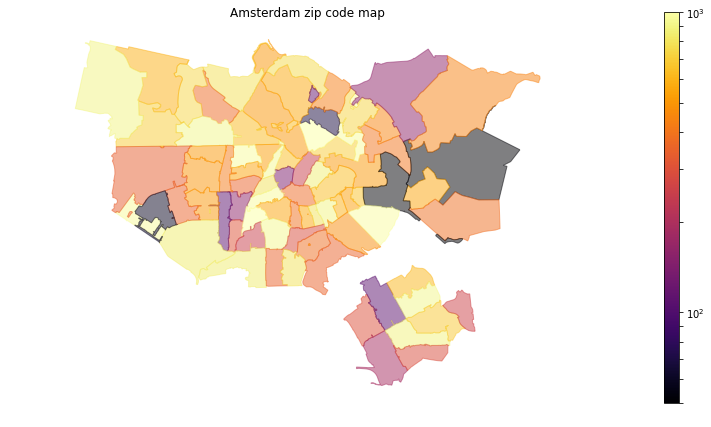

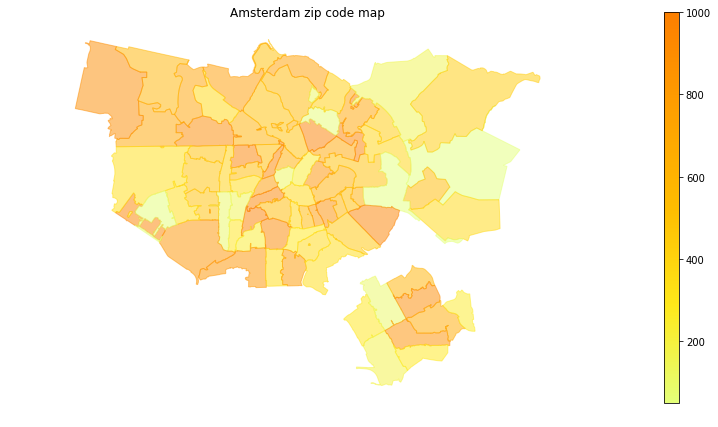

In [69]:
# make sure the provided data is an dict of postal codes
plotMap(df[0])
plotMap(df[0], 'Wistia', 'normal') 